# BATDOG <a class="tocSkip">

### *The <font color=red>B</font>ayesian <font color=red>A</font>s<font color=red>t</font>rometric <font color=red>D</font>ust Cart<font color=red>og</font>rapher* <a class="tocSkip">

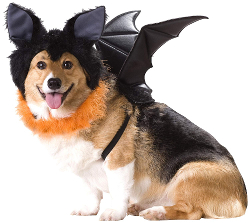

**A Python notebook for processing of parallaxes, comparison with variable star distances and inference of line of sight interstellar extinction to said variable stars.**

This notebook was developed with Table of Contents 2, a Jupyter notebook extension that makes navigating between sections of the code significantly easier. It is strongly recommended that you install this extension. Some details about how to do this can be found here: https://ndres.me/post/best-jupyter-notebook-extensions/ (remember to restart Jupyter after installing nbextensions)

------

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-dependencies" data-toc-modified-id="Imports-and-dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and dependencies</a></span></li><li><span><a href="#Loading-of-data" data-toc-modified-id="Loading-of-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading of data</a></span><ul class="toc-item"><li><span><a href="#Creation-of-PLR-relation-class" data-toc-modified-id="Creation-of-PLR-relation-class-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creation of PLR relation class</a></span></li><li><span><a href="#Setup-of-a-fake-distribution" data-toc-modified-id="Setup-of-a-fake-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup of a fake distribution</a></span></li><li><span><a href="#Assigning-stellar-parameters-to-the-distribution" data-toc-modified-id="Assigning-stellar-parameters-to-the-distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Assigning stellar parameters to the distribution</a></span></li><li><span><a href="#Sampling-experimental-values" data-toc-modified-id="Sampling-experimental-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sampling experimental values</a></span></li></ul></li><li><span><a href="#Setup-of-likelihood-&amp;-priors" data-toc-modified-id="Setup-of-likelihood-&amp;-priors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setup of likelihood &amp; priors</a></span><ul class="toc-item"><li><span><a href="#Priors" data-toc-modified-id="Priors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Priors</a></span><ul class="toc-item"><li><span><a href="#Prior-on-extinction" data-toc-modified-id="Prior-on-extinction-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Prior on extinction</a></span></li><li><span><a href="#Prior-on-parallax" data-toc-modified-id="Prior-on-parallax-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Prior on parallax</a></span></li><li><span><a href="#Prior-on-parallax-offset" data-toc-modified-id="Prior-on-parallax-offset-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Prior on parallax offset</a></span></li><li><span><a href="#Prior-on-scale-length" data-toc-modified-id="Prior-on-scale-length-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Prior on scale length</a></span></li><li><span><a href="#Logarithmic-priors-combination" data-toc-modified-id="Logarithmic-priors-combination-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Logarithmic priors combination</a></span></li></ul></li><li><span><a href="#Likelihood-function" data-toc-modified-id="Likelihood-function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Likelihood function</a></span><ul class="toc-item"><li><span><a href="#Likelihood-of-parallax-data" data-toc-modified-id="Likelihood-of-parallax-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Likelihood of parallax data</a></span></li><li><span><a href="#Likelihood-of-extinction-data" data-toc-modified-id="Likelihood-of-extinction-data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Likelihood of extinction data</a></span></li><li><span><a href="#Likelihood-of-absolute-magnitude-data" data-toc-modified-id="Likelihood-of-absolute-magnitude-data-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Likelihood of absolute magnitude data</a></span></li><li><span><a href="#Likelihood-of-apparent-magnitude-data" data-toc-modified-id="Likelihood-of-apparent-magnitude-data-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Likelihood of apparent magnitude data</a></span></li><li><span><a href="#Probability-of-the-nuisance-magnitude-parameters" data-toc-modified-id="Probability-of-the-nuisance-magnitude-parameters-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Probability of the nuisance magnitude parameters</a></span></li><li><span><a href="#Logarithmic-likelihoods-combination" data-toc-modified-id="Logarithmic-likelihoods-combination-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Logarithmic likelihoods combination</a></span></li></ul></li><li><span><a href="#Posterior" data-toc-modified-id="Posterior-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Posterior</a></span></li></ul></li><li><span><a href="#Creation-of-a-starting-guess" data-toc-modified-id="Creation-of-a-starting-guess-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creation of a starting guess</a></span><ul class="toc-item"><li><span><a href="#Define-a-maximisation-function" data-toc-modified-id="Define-a-maximisation-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Define a maximisation function</a></span></li><li><span><a href="#Set-initial-expected-hyperparameter-guesses" data-toc-modified-id="Set-initial-expected-hyperparameter-guesses-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Set initial expected hyperparameter guesses</a></span></li><li><span><a href="#Run-the-maximisation-function-for-all-stars" data-toc-modified-id="Run-the-maximisation-function-for-all-stars-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Run the maximisation function for all stars</a></span></li><li><span><a href="#Export-the-starting-guesses-into-a-(checked)-set-of-dimensions-guesses" data-toc-modified-id="Export-the-starting-guesses-into-a-(checked)-set-of-dimensions-guesses-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Export the starting guesses into a (checked) set of <em>dimensions</em> guesses</a></span></li><li><span><a href="#eurgh" data-toc-modified-id="eurgh-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>eurgh</a></span></li></ul></li><li><span><a href="#Running-of-emcee" data-toc-modified-id="Running-of-emcee-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Running of emcee</a></span><ul class="toc-item"><li><span><a href="#Define-an-emcee-running-function" data-toc-modified-id="Define-an-emcee-running-function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Define an emcee running function</a></span></li><li><span><a href="#Define-plotting-functions" data-toc-modified-id="Define-plotting-functions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Define plotting functions</a></span></li><li><span><a href="#Initialise-emcee-and-try-a-few-first-steps" data-toc-modified-id="Initialise-emcee-and-try-a-few-first-steps-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Initialise emcee and try a few first steps</a></span></li><li><span><a href="#Run-emcee-for-reals-and-check-output" data-toc-modified-id="Run-emcee-for-reals-and-check-output-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Run emcee <em>for reals</em> and check output</a></span></li></ul></li><li><span><a href="#Data-saving-and-plotting" data-toc-modified-id="Data-saving-and-plotting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data saving and plotting</a></span><ul class="toc-item"><li><span><a href="#Compare-between-true-&amp;-inferred-values" data-toc-modified-id="Compare-between-true-&amp;-inferred-values-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compare between true &amp; inferred values</a></span></li></ul></li><li><span><a href="#Deprecated-code" data-toc-modified-id="Deprecated-code-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Deprecated code</a></span><ul class="toc-item"><li><span><a href="#From-the-maximisation-function" data-toc-modified-id="From-the-maximisation-function-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>From the maximisation function</a></span></li></ul></li></ul></div>

# Imports and dependencies
------

Specify directories

In [284]:
# Directory where we can find data for plotting
data_dir = 'data/'

Import packages

In [285]:
# Packages you probably have:
import numpy as np
from scipy.optimize import minimize  # for some data loading shiz
from scipy.stats import norm
import pandas as pd
import sys
import matplotlib.pyplot as plt
#import progressbar  # for timing MCMC running

# Packages you might not have:
import emcee
import corner  # for plots later

# Local .py files that should be in the same dir as this notebook:
# <none>

# Loading of data
------

## Creation of PLR relation class
We define a PLR relation class with a number of useful methods. Each instance stores its own PLR parameters.

In [308]:
class PLR:
    # Dependencies
    import numpy as np
    
    def __init__(self):
        """Create a, b dictionaries local to each instance for storing 
        PLR parameters.
        """
        self.a = {}
        self.b = {} 
        
    def check_is_list(self, test):
        """Little function for making things lists if they aren't already."""
        if type(test) is not list or np.ndarray:
            return [test]
        else:
            return test
    
    def set_band(self, new_a, new_b, band='default'):
        """Sets the specified band. Defaults to setting it for a single 
        default band. It is entirely possible to pass a list of bands to 
        this method for easy assignment.
        """
        # Typecast inputs as lists if necessary so we can iterate over them
        band = self.check_is_list(band)
        new_a = self.check_is_list(new_a)
        new_b = self.check_is_list(new_b)
               
        # Iterate over input bands and set a, b.
        for a_band, a_new_a, a_new_b in zip(band, new_a, new_b):      
            self.a[a_band] = float(a_new_a)
            self.b[a_band] = float(a_new_b)
    
    def read_band_a(self, band='default'):
        """Reads the specified band a value back to the user."""
        return self.a[band]
    
    def read_band_b(self, band='default'):
        """Reads the specified band b value back to the user."""
        return self.b[band]
    
    def list_of_bands(self):
        """Returns a list of currently loaded bands in a.
        It is assumed that self.a and self.b will always have the same keys,
        at least for proper assignment with the class' set_band method.
        """
        return list(self.a.keys())
        
    # The following are applications of the Leavitt law.
    def magnitude(self, period, band='default'):
        """Returns the apparent magnitude of a variable given a period."""
        return self.a[band] * (np.log10(period) - 1) + self.b[band]
    
    def period(self, magnitude, band='default'):
        """Returns the period of a variable given an apparent magnitude."""
        return np.power(10, (magnitude - self.b[band]) / self.a[band] + 1)

## Setup of a fake distribution
Create a fake data distribution, fuck with it, and go from there.
Try to sample stars from a unifrom density:

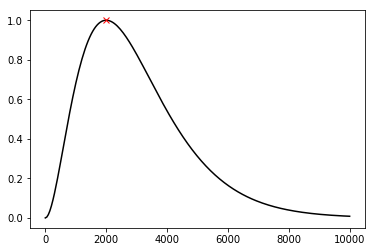

In [309]:
def true_parallax(r):
    """Returns what the exact true parallax 
    should be in arcsecs for a given r."""
    return 1.0/r
    

def stellar_distribution(r, L, fact=1):
    """Returns pdf of a decreasing volume density distribution.
    L    = scale length
    fact = in case we need the -ve of the function and as a 
           factor too to normalise it
    """
    return fact/(2*L**3) * r**2 * np.exp(-r/L)


# Set some parameters
N = 100  # number of stars
N_bands = 1  # number of bands
scale = 1000  # scale factor in pc to apply, roughly half the mode of the pdf

# Work out the maximum of our distribution
pdf_max_x = fmin(stellar_distribution, scale*2, args=(scale, -1), disp=False)
pdf_max_y = stellar_distribution(pdf_max_x, scale)

# Normalise the distribution to have its max at 1 for sampling
factor = 1.0 / pdf_max_y 

# Quick test of the distribution
hi = np.linspace(0, scale*10, num=200)
plt.plot(hi, stellar_distribution(hi, scale, fact=factor), 'k-')
plt.plot([pdf_max_x], stellar_distribution(pdf_max_x, scale, 
                                           fact=factor), 'rx')
plt.show()

Let's sample the real location of the stars

In [310]:
# Use a defined random start number for repeatability
rng = np.random.RandomState(42)

# Some names for star samples, currently just consecutive integers
sampled_ids = pd.Series(list(range(0, N)))

# A pandas DataFrame for all true and experimental data
data = pd.DataFrame(sampled_ids, columns=['ID'])

# Assign a random ra and dec to every star
data['ra'] = pd.Series(np.random.rand(N) * 360)
data['dec'] = pd.Series((np.random.rand(N) - 0.5)*180)

# Sample stellar_distribution to assign distance values to each star
i = 0
r_true = np.zeros(N)
while i < N:
    # Create a test r of size 13 times that of the scale and a deviate test_p 
    # to compare with the interval
    test_r = np.random.rand() * scale * 13
    test_p = np.random.rand()
    
    # See if the test point is in the distribution or not
    if test_p < stellar_distribution(test_r, scale, fact=factor):
        r_true[i] = test_r
        i += 1

# Assign r and implied parallax values we've got to the data frame
data['r_true'] = pd.Series(r_true)
data['omega_true'] = pd.Series((1 / r_true)*1e3)

## Assigning stellar parameters to the distribution
Let's make two PL relations to use; a real one and an experimentally derived one.

In [311]:
real_PLR = PLR()
real_PLR.set_band(-2.7, 3.0)

test_PLR = PLR()
test_PLR.set_band(-2.7, 3.0)

Use the PL relation to infer values for things like magnitude and luminosity.

In [312]:
# Calculate PLR parameters - a period, scatter and absolute magnitude
# Periods between 5 to 20 days. Normal scatter of s.d. 0.4 mag.
dispersion_guess = 0.4
data['P_true'] = pd.Series((20-5)*np.random.rand(N) + 5)
data['s_true'] = pd.Series(np.random.normal(loc=0, scale=dispersion_guess, 
                                            size=N))
data['M_true'] = pd.Series(real_PLR.magnitude(data['P_true']) + data['s_true'])

# Make up an extinction and pull out an implied apparent magnitude
data['A_true'] = pd.Series((2-0.2)*np.random.rand(N) + 0.2)
data['m_true'] = (pd.Series(data['M_true'] + 5*np.log10(data['r_true'] / 10)) 
                  + data['A_true'])

## Sampling experimental values

Now, let's sample some experimental values. **TODO: define an $r^2e^{-r}$ function to act as a model of the distribution of fractional errors on parameters:**

In [313]:
def error_distribution(value, max_error, min_error):
    """Currently just pulls out a random number *roughly* 
    between max_error and min_error.
    """
    random_numbers = (np.random.rand(value.size) * (max_error - min_error) 
                      + min_error)
    return value * random_numbers

Next, we want to mess with all of our true values and generate some experimental ones to play with.

In [372]:
# Use a defined start number for repeatability.
rng = np.random.RandomState(142)

def parallax_error_estimator(magnitude, N):
    """Models parallax error according to Gaia collaboration 
    2018 - Summary of contents & survery properties
    - - - - - - - - - - 
     m   sigma_omega [mas]
    <15  0.02-0.04
     17  0.10
     20  0.70
     21  2.00
    """
    # Always 0.02 below 11
    magnitude = np.where(magnitude <= 11, 0.02, 
                         magnitude)
    
    # Make it big for over 21
    magnitude =  np.where(magnitude > 21, 2 * (magnitude-20), 
                          magnitude)
    
    # Linear between 0.7 at 20, 2.0 at 21
    magnitude = np.where(magnitude > 20, 1.3 * (magnitude-20) + 0.70, 
                         magnitude)
    
    # Linear between 0.1 at 17, 0.7 at 20
    magnitude = np.where(magnitude > 17, 0.20 * (magnitude-17) + 0.10, 
                         magnitude)
    
    # Linear between 0.04 at 15, 0.1 at 17
    magnitude = np.where(magnitude > 15, 0.03 * (magnitude-20) + 0.04, 
                         magnitude)
    
    # Linear between 0.02 at 11, 0.04 at 15
    magnitude = np.where(magnitude > 11, 0.005 * (magnitude-20) + 0.02, 
                         magnitude)
    
    # Add a bit of random error & return
    return magnitude * np.random.normal(loc=1, scale=0.2, size=N)


"""Parallax"""
omega_0 = -0.0  # in mas
parallax_errors = parallax_error_estimator(data['m_true'], N) / 5 ################## BIG DIVISION HERE
data['omega_exp'] = (data['omega_true'] + np.random.normal(loc=0, scale=1, 
                                                           size=N) 
                     * parallax_errors + omega_0)
data['omega_sigma'] = np.abs(parallax_errors)

"""Apparent magnitude (uncorrected for extinction) & extinction estimates"""
# Typical errors from Scowcroft 2016 - typical 0.1-0.2%
app_magnitude_errors = (data['m_true'] 
                        * np.random.normal(loc=0, scale=0.001, size=N))
data['m_exp'] = data['m_true'] + app_magnitude_errors + data['s_true']
data['m_sigma'] = np.sqrt(np.abs(app_magnitude_errors)**2 + 0.001**2)
data['A_exp'] = data['A_true'] * ((0.9-0.5)*np.random.rand(N) + 0.5)
data['A_sigma'] = 0.8 * data['A_exp']   # 80% error on all

"""Period"""
# Typical 1-2% P error
period_errors = data['P_true'] * np.random.normal(loc=0, scale=0.015, size=N)
data['P_exp'] = data['P_true'] + period_errors
data['P_sigma'] = np.sqrt(np.abs(period_errors)**2 + 0.01**2)

"""Inferred absolute magniture from the test PLR"""
### THIS CURRENTLY JUST USES INPUT ERROR - needs knowledge of relationship error also
# We are assuming that the scatter is much greater than the period error
# to justify M being treated as a Gaussian deviate.
data['M_exp'] = pd.Series(test_PLR.magnitude(data['P_exp']) + data['s_true'])
data['M_sigma'] = pd.Series(np.sqrt(
            (test_PLR.read_band_a() * data['P_sigma']/data['P_exp'] 
             * np.log(data['P_exp']))**2 
            + (0 * test_PLR.read_band_b())**2
            + (0 * dispersion_guess)**2))

# """Inferred radii from the test PLR"""
# data['r_exp'] = np.power(10, (data['m_exp'] 
#                              - data['M_exp']) / 5 + 1)
# data['r_exp_u'] = np.power(10, (data['m_exp'] + data['m_sigma']
#                                - data['M_sigma']) / 5 + 1)
# data['r_exp_l'] = np.power(10, (data['m_exp'] - data['m_sigma']
#                                + data['M_sigma']) / 5 + 1)

# Output some data so far to look at what our results are like
data[['m_true', 'omega_true', 'omega_exp', 'omega_sigma']]

m_true  omega_true  omega_exp  omega_sigma
0   15.006713    0.659908   0.669763     0.022364
1   12.176909    1.972021   1.971691     0.004182
2   14.362723    1.020743   1.022093     0.001649
3   16.352184    0.271260   0.274581     0.013111
4   12.353845    1.042468   1.034990     0.004324
5   19.129726    0.229395   0.294370     0.120601
6   11.594723    2.307706   2.304846     0.004500
7   17.064128    0.367387   0.366307     0.032029
8   15.962416    0.449967   0.462928     0.014257
9   16.471169    0.393760   0.403067     0.011768
10  15.350393    0.445975   0.441715     0.021246
11  14.880227    0.459402   0.459943     0.001570
12  16.553854    0.161442   0.164337     0.012158
13  16.060693    0.647885   0.660817     0.012653
14  16.123843    0.437326   0.492454     0.014086
15  15.878954    0.406761   0.405186     0.013570
16  15.018064    0.803038   0.820243     0.022263
17   9.115757    5.667772   5.666688     0.004017
18  16.502078    0.375649   0.378226     0.012385
19  15.045099    0.487345   0.443951     0.021739
20  15.582339    0.765736   0.758904     0.017513
21  17.998554    0.171660   0.201112     0.064757
22  14.284953    0.783689   0.783240     0.001022
23  15.010209    0.882204   0.922846     0.019089
24  15.751564    0.389916   0.406462     0.015526
25  14.936329    0.411192   0.411220     0.000780
26  16.047934    0.413920   0.404331     0.010181
27  14.937407    0.425474   0.424840     0.001326
28  18.983649    0.119529   0.123904     0.128542
29  11.967061    1.937622   1.935814     0.004232
..        ...         ...        ...          ...
70  15.254104    0.566467   0.581814     0.018344
71  15.557511    0.404570   0.381692     0.017578
72  18.131718    0.194750   0.278052     0.073567
73  14.604460    0.333167   0.334202     0.001438
74  17.986533    0.226226   0.443609     0.069524
75  14.317542    0.607132   0.605839     0.001348
76  14.141483    1.090740   1.092001     0.000854
77  14.750988    0.599347   0.596887     0.001907
78  15.207231    0.461193   0.442751     0.018344
79  13.860895    0.815011   0.811728     0.002280
80  15.001963    0.333568   0.336325     0.018451
81  15.212390    0.305683   0.293233     0.024113
82  18.029612    0.237475   0.205273     0.054299
83  16.624950    0.247000   0.252098     0.016055
84  12.352891    2.794987   2.792951     0.002937
85  16.396534    0.441383   0.428273     0.012891
86  17.957635    0.161912   0.126315     0.053881
87  16.723409    0.290922   0.310394     0.014019
88  14.679767    0.499792   0.499725     0.001473
89  15.075846    0.594708   0.589629     0.019835
90  14.005911    0.887130   0.887125     0.001680
91  15.020649    0.291906   0.254281     0.017315
92  19.245621    0.098475   0.115987     0.088900
93  15.319608    0.411186   0.411625     0.018409
94  14.606202    0.598899   0.597967     0.001281
95  15.154529    0.474147   0.514271     0.019228
96  16.102890    0.253287   0.251213     0.012026
97  17.212005    0.231281   0.243435     0.028571
98  13.744362    1.071877   1.072890     0.002636
99  17.332689    0.235227   0.239166     0.026340

[100 rows x 4 columns]

# Setup of likelihood & priors
------

**N.B. everything here returns the result of a log.**

## Priors
### Prior on extinction
This is simply a uniform prior to constrain the extinction co-efficient to something reasonable.

In [331]:
def prior_extinction(params, r, debug):
    """Currently, a uniform prior between a reasonable range for an 
    extinction co-efficient."""
    # Constants
    max_extinction = 3
    min_extinction = 0.05
    
    # Set any incorrect range extinctions to -np.inf (log of 0) and return A
    answer = np.where(np.logical_or(params[r['A']] < min_extinction, 
                                    params[r['A']] > max_extinction), 
                      -np.inf, 0)
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_extinction encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Prior on parallax
*Parallax is extremely dangerous. We must deal with it!* The following computes the parallax prior, which is effectively our distance prior but flipped around a bit.

In [332]:
def prior_parallax(params, r, debug):
    """The distance prior but in terms of parallax. We check for any cheeky 
    parallaxes less than zero and set them to -np.inf; if not, set to 
    distance prior.
    """
    # Apply distance prior
    answer = np.where(params[r['omega']] < 0, -np.inf, 
                      np.log(1/(2 * params[r['L']]**3 * params[r['omega']]**2)) 
                      - 1 / (params[r['omega']] * params[r['L']]))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_parallax encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Prior on parallax offset
A uniform prior to constrain $\omega_0$ to a reasonable value.

In [333]:
def prior_parallax_offset(params, r, debug):#
    """A uniform prior in a defined reasonable range for omega_0."""
    # Constants (in mas)
    max_omega_0 = 0.001
    min_omega_0 = -0.001
    
    # Check if we're in the correct range
    if (params[r['omega_0']] <= max_omega_0 
        and params[r['omega_0']] >= min_omega_0):
        answer = 0
    else:
        answer = -np.inf
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_parallax_offset encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Prior on scale length
A uniform prior within sensible values.

In [334]:
def prior_scale(params, r, debug):
    """A uniform prior defined in a reasonable range for L."""
    # Constants
    max_scale = 1200
    min_scale = 800
    
    # Check if we're in the correct range
    if (params[r['L']] <= max_scale 
        and params[r['L']] >= min_scale):
        answer = 0
    else:
        answer = -np.inf
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_scale encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Logarithmic priors combination

In [335]:
def prior_total(params, r, debug):
    """Sums all of the priors. Convenience function!"""
    return (np.sum(prior_extinction(params, r, debug))
            + np.sum(prior_parallax(params, r, debug))
            + prior_parallax_offset(params, r, debug)
            + prior_scale(params, r, debug))
    

## Likelihood function
Parts of the likelihood fn are defined here.

### Likelihood of parallax data

In [336]:
def likelihood_parallax(params, r, data, debug):
    """Returns a normal distribution evaluated at the measured Gaia parallax 
    value, with:
    
    mean = the inferred parallax value plus the Gaia zero-point offset
    standard deviation = the error on the Gaia parallax value
    """
    # Pull parallax likelihood from our normal distribution
    answer = np.log(norm(params[r['omega']] + params[r['omega_0']], 
                         data['omega_sigma']).pdf(data['omega_exp']))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_parallax encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Likelihood of extinction data

In [338]:
def likelihood_extinction(params, r, data, debug):
    """Returns a normal distribution evaluated at the measured extinction 
    value, with:
    
    mean = the measured extinction value
    standard deviation = the error on the extinction value
    """
    # Pull extinction likelihood from our normal distribution
    answer = np.log(norm(params[r['A']], data['A_sigma']).pdf(data['A_exp']))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_extinction encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    #return answer
    return 0

### Likelihood of absolute magnitude data

In [339]:
def likelihood_abs_mag(params, r, data, debug):
    """This currently assumes the absolute magnitude is normally distributed.
    IT IS NOT.
    This should be changed later :)
    """
    # Pull likelihood from normal distribution
    answer = np.log(norm(params[r['M']], data['M_sigma']).pdf(data['M_exp']))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_abs_mag encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Likelihood of apparent magnitude data

In [340]:
def likelihood_app_mag(params, r, data, debug):
    """This currently assumes the apparent magnitude is normally distributed.
    IT IS NOT.
    This should be changed later :)
    """
    app_mag_error = np.sqrt(data['m_sigma']**2)# + data['A_sigma']**2)
    
    distribution = norm(params[r['M']] + params[r['A']] + 10 
                        - 5 * np.log10(params[r['omega']])
                        , app_mag_error).pdf(np.array(data['m_exp']))
    
    # Only take a log when distribution isn't gonna make it be infinity
    # This catches a common warning message
    answer = np.where(distribution > 1e-320, np.log(distribution), -np.inf)
    
    """
    print("data mags: {}".format(np.array(data['m_exp'])))
    print("mags: {}".format(params[r['M']]))
    print("exts: {}".format(params[r['A']]))
    print("log om: {}".format(np.log10(params[r['omega']])))
    print("\ninput: {}".format(params[r['M']] + params[r['A']] + 10 - 5 
                             * np.log10(params[r['omega']])))
    print("dist: {}".format(distribution))
    print("answer: " + str(answer))
    """
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_app_mag encountered infs in:")
            print(np.where(np.isfinite(answer) == False))

    return answer

### Probability of the nuisance magnitude parameters

In [341]:
def likelihood_nuisance(params, r, debug):
    """Currently just a test that both the apparent and absolute magnitudes
    are within reasonable ranges.
    """
    # Constants
    max_M = 0
    min_M = 7
    max_m = 5
    min_m = 25
    
    # Test apparent and absolute magnitudes
    test_M = np.logical_or(params[r['M']] < max_M, params[r['M']] > min_M)
    test_m = np.logical_or(params[r['m']] < max_m, params[r['m']] > min_m)
    answer = np.where(np.logical_or(test_M, test_m), -np.inf, 0)
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_nuisance encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Logarithmic likelihoods combination

In [342]:
def likelihood_total(params, ranges, data, debug):
    """Sums all of the likelihood functions. Convenience function!"""
    return (np.sum(likelihood_parallax(params, ranges, data, debug))
            + np.sum(likelihood_extinction(params, ranges, data, debug))
            + np.sum(likelihood_abs_mag(params, ranges, data, debug))
            + np.sum(likelihood_app_mag(params, ranges, data, debug))
            + np.sum(likelihood_nuisance(params, ranges, debug)))

## Posterior
The last prep step! This function defines our log posterior.

In [343]:
def posterior(params, ranges, data, debug=False):
    """Sums all of the logarithmic likelihoods and priors."""
    return (likelihood_total(params, ranges, data, debug) 
            + prior_total(params, ranges, debug))

# Creation of a starting guess
------

For any decent number of stars, the model has a huge number of dimensions. To improve the convergence time of the model, we can use function minimisation methods for each individual star and some intuition with hyperparameters to have a guess that's at a good initial probability.

## Define a maximisation function

In [380]:
def maximise_likelihood(star, data, omega_0, L):
    """Maximises a given star's likelihood in order to find a good initial 
    guess at its parameters.
    
    Currently, this takes omega, omega_0, L, m and M values as given, and only 
    fits for A. This has, in the past, stopped the minimisation function
    from being a colossal prick
    
    If the function fails for whatever reason (usually because it can't stop 
    getting -np.inf for a given star,) then success will be set to False and 
    the star will not be added to the parameters to solve for. If this happens, 
    then the user should really try and work out why (and get the star working)
    before proceeding, to ensure that selection effects stemming from the
    effectiveness of this guesser do not appear in the final model.
    """
    # Assume we're gonna get through ok
    success = True
    
    # A synthetic ranges dictionary to trick posterior() into working
    ranges = {'omega':0,
              'omega_0':1,
              'L':2,
              'A':list(range(3, 3 + 1*N_bands)),
              'm':list(range(3 + 1*N_bands, 3 + 2*N_bands)),
              'M':list(range(3 + 2*N_bands, 3 + 3*N_bands))}
    
    # Set any -ve parallaxes to the PLR implied parallax
    if data['omega_exp'][a_star] <= 0:
        omega = np.power(10, (data['M_exp'][a_star] + data['A_exp'][a_star] 
                                  + 10 - data['m_exp'][a_star]) / 5)
    else:
        omega = data['omega_exp'][a_star]
    
    # Create other guess parameters
    A = data['A_exp'][a_star]
    m = data['m_exp'][a_star]
    M = data['M_exp'][a_star]   
    
    """Check for likelihood_app_mag infinity issues"""
    guess = np.array([omega, omega_0, L, A, m, M])
    likelihood_test = likelihood_app_mag(guess, ranges, data, debug=False)
    if np.isfinite(likelihood_test) == False or likelihood_test < -300:
        print("Star {} gives an instant inf. Attempting to fix.".format(star))
        
        # Slowly change the extinction to see if this fixes the problem
        counter = 1
        while True:
            guess[ranges['A']] += 0.001  
            
            new_likelihood_test = likelihood_app_mag(guess, ranges, data, 
                                                     debug=False)
            
            # If the extinction prior is now false, then I guess we've
            # totally failed to fix this star. =(
            if np.isfinite(prior_extinction(guess, ranges, 
                                            debug=False)) == False:
                print("Prior_extinction is now infinite. Star {} has failed\n"
                      .format(star)
                      + " after {} attempts.".format(counter))
                success = False
                break            
                
            # Otherwise, see if the likelihood is better now:
            elif (np.isfinite(new_likelihood_test) and new_likelihood_test < likelihood_test):
                print("likelihood_app_mag is now finite. Moving on...")
                guess[ranges['A']] -= 0.001  
                break
                
            # Otherwise, update a counter and try the loop again
            else:
                likelihood_test = new_likelihood_test
                counter += 1
                
    """Run scipy minimisation function"""
    if success:
        print("Minimising star {}...".format(star))

        # Remove omega_0, L, m and M from guess so that they're locked
        guess = np.array([omega, A])

        # Multiply the posterior by -1 when returning so that it's 
        # minimized, not maximized
        def function_to_minimize(params, omega_0, L, m, M, ranges, data):
            params = np.insert(params, 1, [omega_0, L])
            params = np.append(params, m)
            params = np.append(params, M)
            return -1 * posterior(params, ranges, data)

        # Actually do the scipy bit
        result = minimize(function_to_minimize, guess, 
                 args=(omega_0, L, m, M, ranges, data), 
                 method='Nelder-Mead',
                 options={'maxiter':2000})

        # 'result' is a scipy.optimize.OptimizeResult object that we need 
        # to split up
        omega = result.x[ranges['omega']]
        A = result.x[list(np.array(ranges['A']) - 2)]
        success = result.success
        
        a_posterior = -1 * function_to_minimize([omega, A], omega_0, 
                            L, m, M, ranges, data)
        
        if success and np.isfinite(a_posterior):
            print("  minimised star {}. Posterior = {}. Omega = {}. A = {}\n"
                  .format(star, a_posterior, omega, A))
        else:
            print("Minimisation failed on star {} after ??? iterations =(\n"
                  .format(star))
    
    return [success, omega, A, m, M]

## Set initial expected hyperparameter guesses

In [381]:
guess_omega_0 = 0.0
guess_L = 1000

## Run the maximisation function for all stars

In [382]:
# Define ranges that will be where data is stored in the overall
# mcmc position vector.

guess_omega = []
guess_A = []
guess_m = []
guess_M = []
fails = []

# Cycle over all stars and get guesses on their parameters
for a_star in range(N):
    success, a_guess_omega, a_guess_A, a_guess_m, a_guess_M = maximise_likelihood(a_star, data.iloc[[a_star]], \
                                               guess_omega_0, guess_L)
    
    # Only add the star to the parameter set if it's not going to cause issues.
    if success:
        guess_omega.append(a_guess_omega)
        guess_A.append(a_guess_A[0])
        guess_m.append(a_guess_m)
        guess_M.append(a_guess_M)
    else:
        fails.append(a_star)

print('All done! We failed {} times.'.format(len(fails)))

Minimising star 0...
  minimised star 0. Posterior = -11.301113824647361. Omega = 0.6682501292722296. A = [0.56138914]

Minimising star 1...
  minimised star 1. Posterior = -12.046613179627869. Omega = 1.971660981589269. A = [1.31461284]

Minimising star 2...
  minimised star 2. Posterior = -11.605551820219162. Omega = 1.0220864960626366. A = [0.72962234]

Star 3 gives an instant inf. Attempting to fix.


/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


likelihood_app_mag is now finite. Moving on...
Minimising star 3...


/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Minimisation failed on star 3 after ??? iterations =(

Star 4 gives an instant inf. Attempting to fix.
Prior_extinction is now infinite. Star 4 has failed
 after 2504 attempts.
Star 5 gives an instant inf. Attempting to fix.
likelihood_app_mag is now finite. Moving on...
Minimising star 5...
Minimisation failed on star 5 after ??? iterations =(

Minimising star 6...
  minimised star 6. Posterior = -13.659360795324696. Omega = 2.3048351838166266. A = [0.84681588]

Star 7 gives an instant inf. Attempting to fix.
likelihood_app_mag is now finite. Moving on...
Minimising star 7...
  minimised star 7. Posterior = -11.837158468975474. Omega = 0.36062627511305384. A = [1.94543815]

Star 8 gives an instant inf. Attempting to fix.
likelihood_app_mag is now finite. Moving on...
Minimising star 8...


KeyboardInterrupt: 

## Export the starting guesses into a (checked) set of *dimensions* guesses

In [235]:
ranges = {'omega':list(range(0,N)),
          'omega_0':N,
          'L':N+1,
          'A':list(range(N+2, N+2 + 1*N*N_bands)),
          'm':list(range(N+2 + 1*N*N_bands, N+2 + 2*N*N_bands)),
          'M':list(range(N+2 + 2*N*N_bands, N+2 + 3*N*N_bands))}

# Append all the guesses together
starting_guess = np.append(guess_omega, [guess_omega_0])
starting_guess = np.append(starting_guess, [guess_L])
starting_guess = np.append(starting_guess, guess_A)
starting_guess = np.append(starting_guess, guess_m)
starting_guess = np.append(starting_guess, guess_M)

# Some parameters for the MCMC simulation
dimensions = starting_guess.size
walkers = 4 * dimensions

# Extend the starting guess to our number of walkers' dimensions
rng = np.random.RandomState(42)
starting_guesses = starting_guess + 0.0001 * rng.randn(walkers, dimensions)  # SHOULD MULTIPLY BY THE DESIRED RANGE OF PARAMS

A quick check of the value of the posterior given starting_guess:

In [236]:
start_posteriors = []
for a_guess in range(walkers):
    start_posteriors.append(posterior(starting_guesses[a_guess], ranges, data, 
                                      debug=True))
start_fails = np.where(np.isfinite(start_posteriors) == False)
print('There are {} bad guesses.'.format(start_fails[0].shape[0]))


prior_extinction encountered infs in:
(array([ 0, 53, 68]),)

prior_extinction encountered infs in:
(array([ 0,  5, 53]),)

prior_extinction encountered infs in:
(array([ 0, 46, 68]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53, 68]),)

prior_extinction encountered infs in:
(array([ 5, 46]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([46, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([46, 53, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 5, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 46, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([53, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 5, 53, 68]),)

prior_extinction encountered infs i


prior_extinction encountered infs in:
(array([ 0, 53]),)

prior_extinction encountered infs in:
(array([ 0,  5, 46]),)

prior_extinction encountered infs in:
(array([ 5, 68]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([ 0, 68]),)

prior_extinction encountered infs in:
(array([ 0,  5, 95]),)

prior_extinction encountered infs in:
(array([ 5, 95]),)

prior_extinction encountered infs in:
(array([ 0, 68]),)

prior_extinction encountered infs in:
(array([ 5, 46]),)

prior_extinction encountered infs in:
(array([ 0, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 68]),)

prior_extinction encountered infs in:
(array([ 0, 68]),)

prior_extinction encountered infs in:
(array([ 0,  5, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 46, 53]),)

prior_extinction encountered infs in:
(array([ 0, 53, 68]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([46, 6

(array([95]),)

prior_extinction encountered infs in:
(array([ 0, 46, 68]),)

prior_extinction encountered infs in:
(array([ 5, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53]),)

prior_extinction encountered infs in:
(array([ 0,  5, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 0, 53]),)

prior_extinction encountered infs in:
(array([ 0, 68]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 5, 95]),)

prior_extinction encountered infs in:
(array([53, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 46, 53]),)

prior_extinction encountered infs in:
(array([ 0, 53]),)

prior_extinction encountered infs in:
(array([0, 5]),)

prior_extinction encountered infs in:
(array([ 5, 46, 95]),)

prior_extinction encountered infs in:
(array([ 5, 46, 53, 95]),)

prior_extinction e


prior_extinction encountered infs in:
(array([ 5, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53]),)

prior_extinction encountered infs in:
(array([ 5, 95]),)

prior_extinction encountered infs in:
(array([ 0, 68]),)

prior_extinction encountered infs in:
(array([46]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([ 5, 46, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([5]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([53, 68, 95]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([ 5, 53, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 46, 53]),)

prior_extinction encountered infs in:
(array([ 0, 53, 95]),)

prior_extinction encountered infs in:
(array([ 0, 53, 68]),)

prior_extinction encountered infs in:
(array([ 5, 53


prior_extinction encountered infs in:
(array([68, 95]),)

prior_extinction encountered infs in:
(array([46, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 46, 53, 68]),)

prior_extinction encountered infs in:
(array([ 0, 53, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([46]),)

prior_extinction encountered infs in:
(array([53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 0, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([53]),)

prior_extinction encountered infs in:
(array([ 0, 95]),)

prior_extinction encountered infs in:
(array([53, 95]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([ 0, 53, 95]),)

prior_extinction encountered infs in:
(array([68, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 68, 95]),)

prior_extinction encountered infs in:
(array([53]),)

prior_extinction encountered infs in:
(array([ 


prior_extinction encountered infs in:
(array([ 0, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 53]),)

prior_extinction encountered infs in:
(array([ 0,  5, 95]),)

prior_extinction encountered infs in:
(array([53, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 46]),)

prior_extinction encountered infs in:
(array([ 5, 53]),)

prior_extinction encountered infs in:
(array([ 0,  5, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 53]),)

prior_extinction encountered infs in:
(array([53]),)

prior_extinction encountered infs in:
(array([68, 95]),)

prior_extinction encountered infs in:
(array([46, 68]),)

prior_extinction encountered infs in:
(array([0, 5]),)

prior_extinction encountered infs in:
(array([46, 95]),)

prior_extinction encountered infs in:
(array([ 5, 68, 95]),)

prior_extinction encountered infs in:
(array([46, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([ 5,


prior_extinction encountered infs in:
(array([ 5, 46, 53, 95]),)

prior_extinction encountered infs in:
(array([ 0, 68, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 46, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53, 95]),)

prior_extinction encountered infs in:
(array([53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 53, 68]),)

prior_extinction encountered infs in:
(array([53, 68, 95]),)

prior_extinction encountered infs in:
(array([46, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([53]),)

prior_extinction encountered infs in:
(array([ 0, 46]),)

prior_extinction encountered infs in:
(array([ 0, 68, 95]),)

prior_extinction encountered infs in:
(array([46, 53, 95]),)

prior_extinction encountered infs in:
(array([ 0, 53, 95]),)

pri

(array([46, 53, 95]),)

prior_extinction encountered infs in:
(array([53]),)

prior_extinction encountered infs in:
(array([53, 68, 95]),)

prior_extinction encountered infs in:
(array([5]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([5]),)

prior_extinction encountered infs in:
(array([ 5, 68]),)

prior_extinction encountered infs in:
(array([ 0, 53, 68]),)

prior_extinction encountered infs in:
(array([ 5, 46]),)

prior_extinction encountered infs in:
(array([68, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([46]),)

prior_extinction encountered infs in:
(array([ 0, 46]),)

prior_extinction encountered infs in:
(array([ 0, 53]),)

prior_extinction encountered infs in:
(array([ 0,  5, 68, 95]),)

prior_extinction encountered infs in:
(array([53, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 0, 46, 53, 68])


prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([53, 68]),)

prior_extinction encountered infs in:
(array([53, 68]),)

prior_extinction encountered infs in:
(array([46, 53, 95]),)

prior_extinction encountered infs in:
(array([ 0, 95]),)

prior_extinction encountered infs in:
(array([5]),)

prior_extinction encountered infs in:
(array([ 0, 53, 95]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([ 0,  5, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 0, 53]),)

prior_extinction encountered infs in:
(array([ 5, 46, 53, 95]),)

prior_extinction encountered infs in:
(array([ 0,  5, 53]),)

prior_extinction encountered infs in:
(array([0]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 46]),)

prior_extinction encountered infs in:
(array([ 0, 53, 68]

(array([0, 5]),)

prior_extinction encountered infs in:
(array([68, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53]),)

prior_extinction encountered infs in:
(array([ 0,  5, 68]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 0, 46, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([95]),)

prior_extinction encountered infs in:
(array([ 0, 46, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53, 95]),)

prior_extinction encountered infs in:
(array([ 5, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([ 0, 53, 68, 95]),)

prior_extinction encountered infs in:
(array([5]),)

prior_extinction encountered infs in:
(array([ 5, 46, 68]),)

prior_extinction encountered infs in:
(array([53]),)

prior_extinction encountered infs in:
(array([68]),)

prior_extinction encountered infs in:
(array([ 5, 53]),)

prior_extinction encountered infs in:
(array([ 5, 95]),)

prior_extinction encountered in

In [248]:
print(guess_A[0])
data.iloc[[0]]

0.050031512589714375


ID          ra        dec      r_true  omega_true     P_true    s_true  \
0   0  275.379077  76.759469  919.521227    1.087522  11.005647 -0.929559   

     M_true   A_true     m_true  omega_exp  omega_sigma      m_exp  m_sigma  \
0  1.958079  0.87828  12.654168   1.088723     0.014084  11.725197  0.00116   

      A_exp   A_sigma      P_exp   P_sigma     M_exp  M_sigma  
0  0.681457  0.545166  10.777559  0.228307  1.982636  0.13598

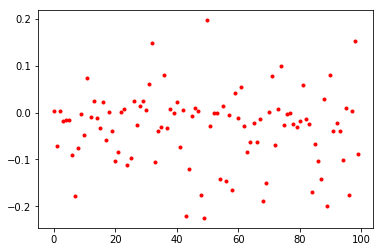

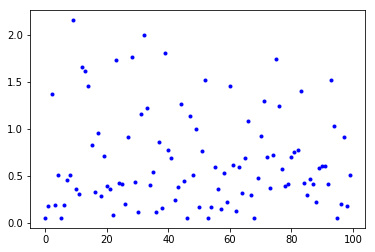

In [249]:
plt.plot(list(range(N)), (guess_omega - data['omega_true']), 'r.')
plt.show()
plt.plot(list(range(N)), (guess_A), 'b.')
plt.show()

## eurgh

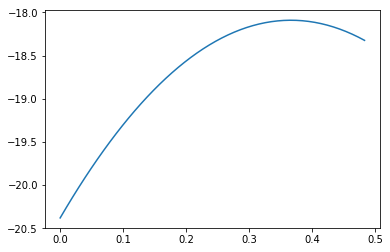

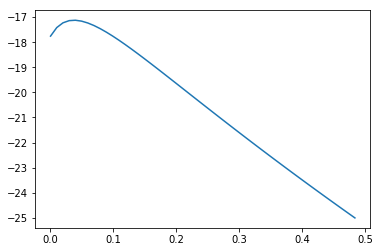

0.0565836019467225


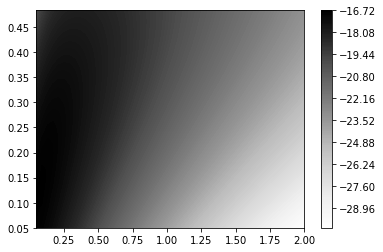

In [282]:
ranges = {'omega':0,
              'omega_0':1,
              'L':2,
              'A':list(range(3, 3 + 1*N_bands)),
              'm':list(range(3 + 1*N_bands, 3 + 2*N_bands)),
              'M':list(range(3 + 2*N_bands, 3 + 3*N_bands))}

a_star = 20

ext = np.linspace(0.05, 2)
y = []
for i in ext:
    a_params = np.array([data['omega_true'][a_star], guess_omega_0, guess_L, 
                         i, guess_m[a_star], guess_M[a_star]])
    
    y.append(posterior(a_params, 
                       ranges, 
                       data.iloc[[a_star]]))
             
plt.plot(x, y)
plt.show()

ome = np.linspace(0.05, data['omega_true'][a_star]*3)
y = []
for i in ome:
    a_params = np.array([i, guess_omega_0, guess_L, 
                         data['A_exp'][a_star], guess_m[a_star], guess_M[a_star]])
    
    y.append(posterior(a_params, 
                       ranges, 
                       data.iloc[[a_star]]))
             
plt.plot(x, y)
plt.show()

print(guess_omega[a_star])

coords = np.meshgrid(ext, ome)

#for a_coord in coords:
    #vals = posterior()
    
vals = np.zeros((50, 50))
i = 0
for an_ext in ext:
    j = 0
    for an_ome in ome:
        a_params = np.array([an_ome, guess_omega_0, guess_L, 
                             an_ext, guess_m[a_star], guess_M[a_star]])
        
        vals[i, j] = posterior(a_params, 
                               ranges, 
                               data.iloc[[a_star]])
        j += 1
    i += 1
    
plt.contourf(coords[0], coords[1], vals, 200, cmap='Greys')
plt.colorbar()
plt.show()

In [266]:
data.iloc[[20]]

ID         ra       dec       r_true  omega_true     P_true    s_true  \
20  20  51.920797  81.53405  6208.632246    0.161066  18.830609  0.178809   

      M_true    A_true     m_true  omega_exp  omega_sigma      m_exp  \
20  2.436675  1.471414  17.873069   0.279807     0.361073  18.045605   

     m_sigma     A_exp   A_sigma      P_exp   P_sigma     M_exp   M_sigma  
20  0.006353  1.221027  0.976821  19.038105  0.207737  2.423825  0.086806

In [255]:
a_params[[1, 2]]

TypeError: list indices must be integers or slices, not list

# Running of emcee
------

The game is on! It's time to run emcee and see what results we can get.

## Define an emcee running function

In [83]:
def run_emcee_for_me(sampler, steps=100, reset=False, guess=0, 
                     step_increment=1):
    """Auto-runs emcee, giving an update on each step done and 
    estimating runtime.
    """    
    # See if we need to start from a guess
    if type(guess) is int:
        # Set to last sampler position
        last_pos = sampler.chain[:, -1, :]
    else:
        # Set to the guess
        last_pos = guess
        
    # Wipe the sampler's memory if required
    if reset == True:
        sampler.reset()
    
    # A bit of start output
    sys.stdout.write("BATDOG is running!\n  steps={}\n\n".format(steps))
    sys.stdout.flush()
    
    # Loop until we reach steps
    current_step = 1
    while current_step <= steps:
        last_pos, last_prob, last_state = sampler.run_mcmc(last_pos, 
                                                           step_increment)
        sys.stdout.write("\rDone {} steps. ETA: {}"
                         .format(current_step, "W.I.P."))
        sys.stdout.flush()
        current_step += step_increment
    
    # Add a blank line at the end
    sys.stdout.write("\r                                 ")
    sys.stdout.flush()

## Define plotting functions

In [84]:
def plot_chains(sampler, star=0, start=False):
    """Plots the current stored chain output for a given star."""
    names = list(ranges.keys())
    
    # Gets the requisite parameter numbers for a given star
    values = [ranges['omega'][0] + star, 
              ranges['omega_0'], 
              ranges['L'], 
              ranges['A'][0] + star, 
              ranges['m'][0] + star, 
              ranges['M'][0] + star]
    
    # Check if the user specified a start point to plot from
    if start != False:
        s = start
    else:
        s = 0
    
    fig, ax = plt.subplots(7, figsize=(8, 10), sharex=True)

    # Plots likelihood
    ax[0].plot(sampler.lnprobability.T, '-r', alpha=0.2)
    ax[0].set_ylabel('lnprob')

    # Plots parameter evolution
    j=0  # Parameter to try
    for i in values:
        ax[j+1].plot(sampler.chain[:, s:, values[j]].T, '-k', alpha=0.2);
        ax[j+1].set_ylabel(names[j])
        j += 1
    plt.show()
        
def plot_corner(sampler, star=0, start=False):
    """Makes a corner plot using corner.py."""
    names = list(ranges.keys())
    values = [ranges['omega'][0] + star, 
              ranges['omega_0'], 
              ranges['L'], 
              ranges['A'][0] + star, 
              ranges['m'][0] + star, 
              ranges['M'][0] + star]
    
    # Check if the user specified a start point to plot from
    if start != False:
        s = start
    else:
        s = 0
    
    # Make a corner plot
    corner.corner(sampler.flatchain[:, values], 
                  labels=names, 
                  truths=[data['omega_true'][star], 
                          omega_0, 
                          scale, 
                          data['A_true'][star], 
                          data['m_true'][star], 
                          data['M_true'][star]],
                  quantiles=[0.16, 0.5, 0.84],
                  show_titles=True,
                  title_fmt='.4f',
                  title_kwargs={"fontsize":12},
                  scale_hist=True)
    plt.show()

## Initialise emcee and try a few first steps

In [86]:
# Define the sampler
sampler = emcee.EnsembleSampler(walkers, dimensions, posterior, 
                                args=(ranges, data), kwargs={'debug':False}, 
                                threads=8)

# Set random state for repeatability
sampler.random_state = rng

%time run_emcee_for_me(sampler, steps=100, guess=starting_guesses)

BATDOG is running!
  steps=100



/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


                                 CPU times: user 8.55 s, sys: 6.5 s, total: 15 s
Wall time: 3min 4s


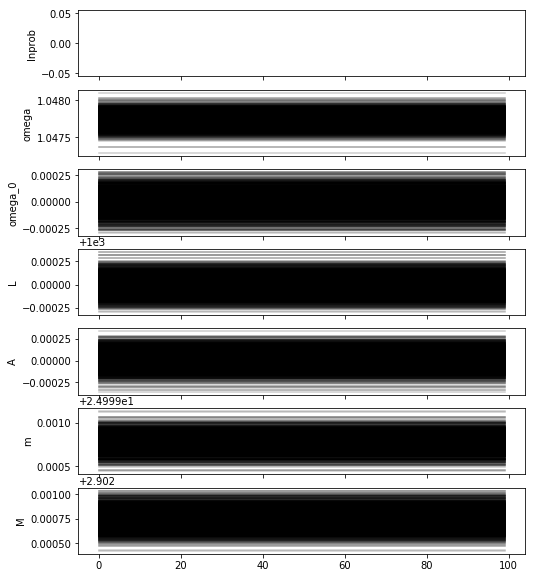

In [87]:
# Plot chains output
plot_chains(sampler, star=10)

## Run emcee *for reals* and check output

In [103]:
%time run_emcee_for_me(sampler, reset=True, steps=1000)

BATDOG is running!
  steps=1000

                                 CPU times: user 5min 12s, sys: 11min 2s, total: 16min 15s
Wall time: 45min 33s


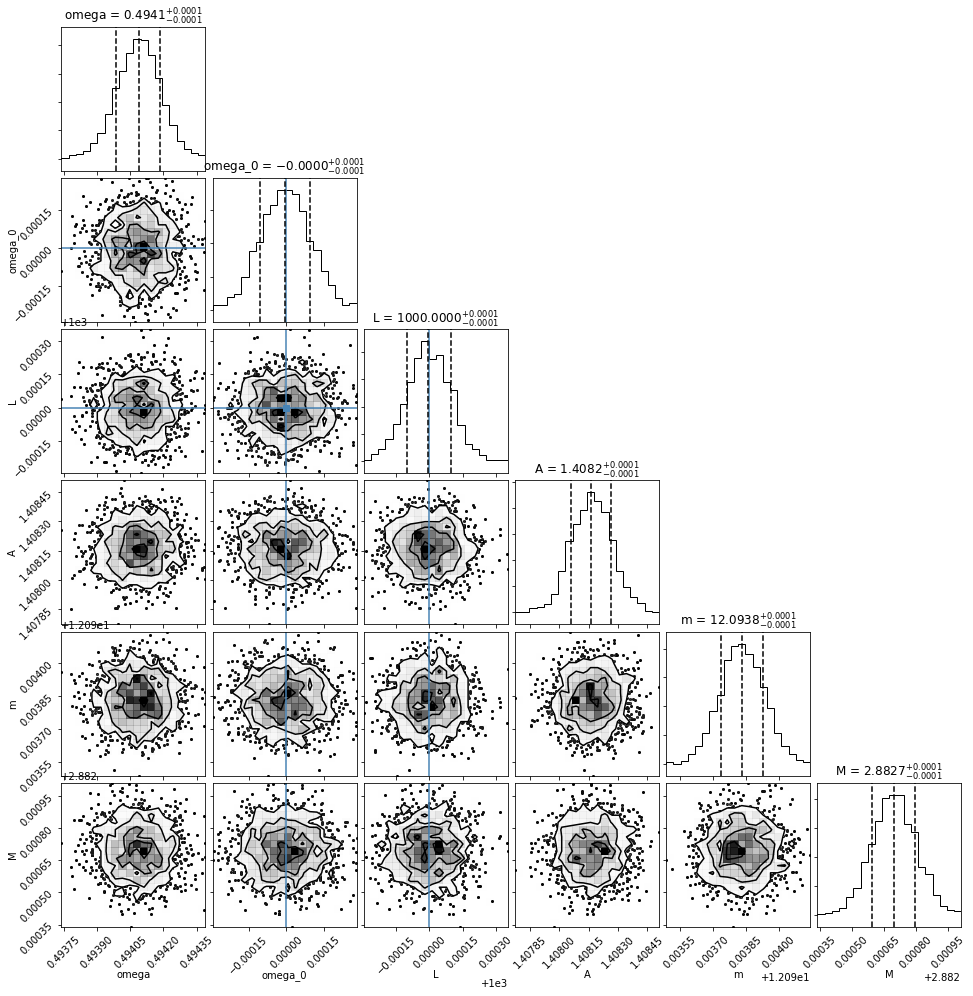

In [93]:
star_to_try = 20

# Make a corner plot
plot_corner(sampler, star=star_to_try)

In [92]:
# Get data on star star_to_try
data.iloc[[star_to_try]][['omega_true', 'omega_exp', 'omega_sigma', 'm_true', 
                          'm_exp', 'm_sigma', 'M_true', 'M_exp', 'M_sigma', 
                          'A_true', 'A_exp', 'A_sigma']]

omega_true  omega_exp  omega_sigma     m_true      m_exp   m_sigma  \
5     0.52592   0.525939     0.085004  15.596454  15.619127  0.005684   

     M_true     M_exp   M_sigma   A_true     A_exp  A_sigma  
5  3.027421  3.007508  0.402498  1.17363  0.846084  0.20568

# Data saving and plotting
------
First, outline a way to convert back from the emcee format to a format for easy output and comparison.

## Compare between true & inferred values

# Deprecated code

## From the maximisation function